In [4]:
#useful packages
import numpy as np
from numpy import linalg as LA
import math as mt
import os
from matplotlib.image import imread
import matplotlib.pyplot as plt
from matplotlib import rcParams # for changing default values
import scipy.io as sio
import scipy.optimize
from scipy.optimize import minimize
import timeit
import torch
from torch.autograd import grad
import torch.nn as nn
import torch.optim as optim
import random
from scipy.integrate import odeint


### Examples of numpy from Mechanics of solids

In [ ]:
v = np.array([1., 2., 3.])
A = np.array([[1., 2., 3.], [2., 4., 5.], [3., 5., 6.]])
#print(A)

# dot product
v @ v
v.dot(v)
np.inner(v, v)
np.einsum('i,i', v, v)

# vector product
w=np.array([3.,4.,5.])
c=np.cross(v,w)

# open product
# vectors
np.outer(v, v) # attention, if you use np.outer on a multi-dim array, it flattens it to a vector
np.einsum('i,j', v, v)
# higher order tensors
np.einsum('ij,kl', A, A)

#2nd order unit tensor
delta=np.eye(3)

# single contraction
# A \cdot v
A @ v
A.dot(v)
np.inner(A, v)
np.einsum('ij,j', A, v)
# c \cdot A
v @ A
v.dot(A)
# don’t use np.inner(v, A)!
np.einsum('i,ij', v, A)

# double contraction
# A : A
np.tensordot(A, A, 2)
np.einsum('ij,ij', A, A)

# trace
np.trace(A)
np.einsum('ii', A)

# determinant
np.linalg.det(A)

# matrix power
# A^3
np.linalg.matrix_power(A, 3)

# eigenvalue problem
la, n=np.linalg.eig(A)

# transpose of matrix
A.T

# inverse of matrix
np.linalg.inv(A)

# solve equation system A x= v
np.linalg.inv(A)@v
np.linalg.solve(A,v) #quicker



array([1.00000000e+00, 1.66533454e-16, 0.00000000e+00])

### Examples of plotting

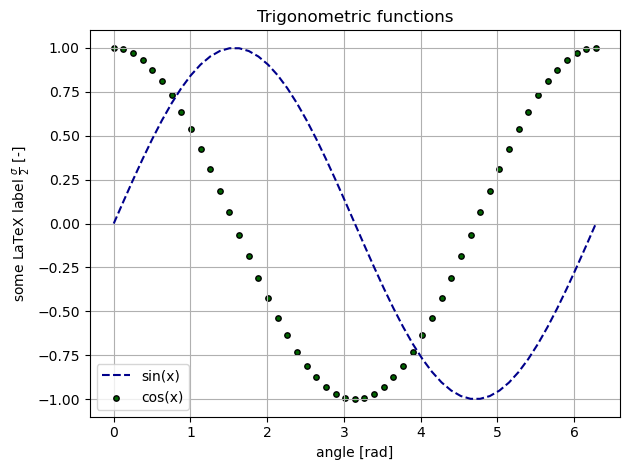

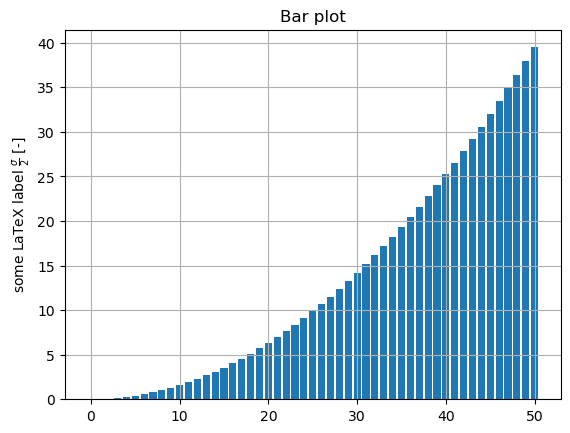

In [32]:

# generate some data
x = np.linspace(0, 2*np.pi, 51)
y1 = np.sin(x)
y2 = np.cos(x)


# Add Labels to the Axis
plt.xlabel('angle [rad]', fontsize=10)    
plt.ylabel(r'some LaTeX label $\frac{\sigma}{2}$ [-]')
plt.title('Trigonometric functions')

# Background grid
plt.grid()

# plot sine and cosine curves
plt.plot(x, y1, label='sin(x)', linestyle='--', color='darkblue')    
plt.scatter(x, y2, s=15, marker='o', facecolors='darkgreen', edgecolors='black', label='cos(x)')    

# Always use a Legend if you have several plots within a single Axis
plt.legend(loc='best')   

# nicer layout
plt.tight_layout()  

# Make sure to use a sufficient resolution when saving pixel graphics
plt.savefig('example_python.png', dpi=600)     
# Or better use vector graphics (e.g. .eps, .svg, .pdf)
plt.savefig('example_python.svg')
plt.show()


#bar example
z=x**2
plt.bar(range(len(z)), z)
plt.ylabel(r'some LaTeX label $\frac{\sigma}{2}$ [-]')
plt.title('Bar plot')
plt.grid()
# display the figure 
plt.show()


### Examples of function:

In [33]:
def sample_correlation_coeff(Xi,Yi): 
    X1=Xi[:]-np.sum(Xi[:])/len(Xi)
    Y1=Yi[:]-np.sum(Yi[:])/len(Yi)
    return X1@Y1/( m.sqrt(X1@X1)*m.sqrt(Y1@Y1) )


distLoad = lambda x: -2*(3*x**2 - 2*x)*np.pi*torch.cos(2*np.pi*x) + 4*(x**3 - x**2 + 1)*np.pi**2*torch.sin(2*np.pi*x)

### Examples of basic python commands

In [34]:
#if statements

def testar(a,b): 
    if b>a:
        print('b>a')
    elif b<a:
        print('b<a')
    elif b==a:
        print('b=a')
    return

for i in range(2):
    print('i=',i)


i= 0
i= 1


### SVD commands

In [35]:
X=np.array([[1.,2.],[3.,4.],[5.,6.]])
#SVD of X
U, S, VT=np.linalg.svd(X,full_matrices=True)

#economy SVD of X
Uec, Sec, VTec=np.linalg.svd(X,full_matrices=False)

#compute L2 norm of matrix
np.linalg.norm(X,2)

#Pseudo inverse
A_pinv=np.linalg.pinv(A)

### Load external data 

In [36]:
# Load data from .csv file
A = np.loadtxt(os.path.join('Lectures/DATA','hald_ingredients.csv'),delimiter=',')


#Load data from .mat file, example
mat_file=sio.loadmat('Lectures/DATA/heat_equation_result.mat')
sio.loadmat('Lectures/DATA/heat_equation_result.mat')
x=mat_file['x'].flatten() # Position vector and flatten to 1D array
t=mat_file['t'].flatten() # Time vector and flatten to 1D array

sio.savemat("mydata.mat", {"t": t}) #save data to .mat file

### Use numerical differentiation in NumPy

In [37]:
nx=100
x = np.linspace(0, 2*np.pi, nx)
y = np.sin(x)
dy_dx   = np.gradient(y, x)      # dy/dx
d2y_dx2 = np.gradient(dy_dx, x)  # d²y/dx²

### Generation of random numbers

In [38]:
np.random.seed(0) # for getting out the same random variables every time (reproducability)
nrows=3; ncolumns=4
np.random.rand(nrows,ncolumns) #gives matrix with random number between 0 and 1
np.random.randn(nrows,ncolumns) #gives matrix with random number using a normal (Gaussian) distribution with mean 0 and variance 1


torch.manual_seed(0)  ## Set a random seed for reproducibility
torch.rand(nrows,ncolumns)
torch.randn(nrows,ncolumns)



# Create a list from 0 to nsamples-1
nsamples = 10   # or any integer
original_list = list(range(nsamples))
# Randomly shuffle the list
shuffled_list = random.sample(original_list, len(original_list))


## Routine for k-fold cross-validation

In [39]:

def train_test_and_k_splits(
    indices,
    test_frac=0.10,          # fraction of data to hold out for the *final test set*
    k=5,                     # number of random validation splits to create
    val_count=None,          # size of each validation set (number of points)
    val_frac=None,           # or fraction of remaining data to use for validation
    seed=42
):
    """
    Split a dataset into:
      1) one fixed test set (held out once and for all)
      2) k random (train, validation) splits from the remaining data

    Parameters
    ----------
    indices : array of int
        All sample indices (e.g., np.arange(n_samples)).
    test_frac : float
        Fraction of total data to hold out as the test set.
    k : int
        Number of random splits to generate from the remaining data.
    val_count : int, optional
        Exact number of validation samples in each split.
    val_frac : float, optional
        Fraction of the *remaining* data to use for validation in each split.
        Used if val_count is not given.
    seed : int
        Random seed for reproducibility.

    Returns
    -------
    test_idx : array of int
        Indices belonging to the test set.
    splits : list of (train_idx, val_idx)
        Each element is a tuple with training indices and validation indices.
    """
    rng = np.random.default_rng(seed)
    n = len(indices)

    # --- Step 1: Create a fixed test set (will never be touched again) ---
    n_test = max(1, int(round(n * test_frac)))  # how many samples in the test set
    test_idx = rng.choice(n, size=n_test, replace=False)  # randomly choose test indices
    test_idx.sort()  # sort for readability

    # Remaining data after removing test set
    mask = np.ones(n, dtype=bool)
    mask[test_idx] = False
    remaining = indices[mask]
    n_rem = len(remaining)

    # --- Step 2: Decide how large each validation set should be ---
    if val_count is None:
        if val_frac is None:
            # if user didn’t specify, default to 20% of remaining data
            val_frac = 0.2
        val_count = max(1, int(round(n_rem * val_frac)))

    if val_count >= n_rem:
        raise ValueError("Validation set must be smaller than remaining data.")

    # --- Step 3: Generate k random splits (train/val) from remaining data ---
    splits = []
    for _ in range(k):
        # randomly choose indices for the validation set (within remaining pool)
        val_local_idx = rng.choice(n_rem, size=val_count, replace=False)
        val_local_idx.sort()

        # build the validation indices
        val_idx = remaining[val_local_idx]

        # everything else in 'remaining' goes to the training set
        rem_mask = np.ones(n_rem, dtype=bool)
        rem_mask[val_local_idx] = False
        train_idx = remaining[rem_mask]

        splits.append((train_idx, val_idx))

    return test_idx, splits

    # --- Example usage ---
data_points = np.array([1, 2, 4, 5, 7, 10, 22])
test_idx, splits = train_test_and_k_splits(
    data_points,
    test_frac=0.10,   # 10% test holdout
    k=5,              # create 5 random validation splits
    val_frac=0.2,     # each split: 20% of remaining data for validation
    seed=1            # random seed for reproducibility
)

# --- Inspect results ---
print("Test set size:", len(test_idx))
print("Test indices:", test_idx)

x=np.linspace(0, 2*np.pi, 51)
y=np.sin(x)+0.1*np.random.randn(len(x))  # noisy sine data
# Loop over the k splits
for i, (train_idx, val_idx) in enumerate(splits, 1):
    print(f"\nSplit {i}")
    print("Train indices:", train_idx)
    print("Validation indices:", val_idx)
    x_train, y_train = x[train_idx], y[train_idx]  #x and y values for training
    x_val, y_val = x[val_idx], y[val_idx] #x and y values for validation

x_test,y_test = x[test_idx], y[test_idx] #x and y values for test


Test set size: 1
Test indices: [3]

Split 1
Train indices: [ 1  2  4 10 22]
Validation indices: [7]

Split 2
Train indices: [ 1  2  4  7 22]
Validation indices: [10]

Split 3
Train indices: [ 1  2  4  7 10]
Validation indices: [22]

Split 4
Train indices: [ 2  4  7 10 22]
Validation indices: [1]

Split 5
Train indices: [ 2  4  7 10 22]
Validation indices: [1]


## Scaling class

In [40]:
class MinMaxScaler:
    def __init__(self, feature_range=(0, 1)):
        self.min_val = feature_range[0]
        self.max_val = feature_range[1]
        self.data_min_ = None
        self.data_max_ = None

    def fit(self, data):
        """Compute the minimum and maximum values for scaling."""
        self.data_min_ = np.min(data)
        self.data_max_ = np.max(data)

    def transform(self, data):
        """Scale the data using the computed min and max values."""
        # Avoid division by zero for constant columns
        scale = (self.max_val - self.min_val) / (self.data_max_ - self.data_min_ + 1e-8)
        return self.min_val + (data - self.data_min_) * scale

    def fit_transform(self, data):
        """Fit and then transform the data."""
        self.fit(data)
        return self.transform(data)

    def inverse_transform(self, scaled_data):
        """Revert the scaling to original values."""
        scale = (self.max_val - self.min_val) / (self.data_max_ - self.data_min_ + 1e-8)
        return (scaled_data - self.min_val) / scale + self.data_min_

# Example usage
data = np.array([[1.0, 2.0],
                 [2.0, 3.0],
                 [3.0, 4.0],
                 [4.0, 5.0]])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

print("Original data:\n", data)
print("Scaled data:\n", scaled_data)

# Inverse transform to get the original data
original_data = scaler.inverse_transform(scaled_data)
print("Inverse transformed data:\n", original_data)


Original data:
 [[1. 2.]
 [2. 3.]
 [3. 4.]
 [4. 5.]]
Scaled data:
 [[0.   0.25]
 [0.25 0.5 ]
 [0.5  0.75]
 [0.75 1.  ]]
Inverse transformed data:
 [[1. 2.]
 [2. 3.]
 [3. 4.]
 [4. 5.]]


## Pytorch and NumPy

In [41]:
#######################
#Matrix multiplication
A=np.random.rand(3,4); B=np.random.rand(4,2)
A_tensor=torch.from_numpy(A).float(); B_tensor=torch.from_numpy(B).float()
result = np.dot(A, B)
result = torch.mm(A_tensor, B_tensor)

#element-wise exponential fcn
result = np.exp(A)
result = torch.exp(A_tensor)

#Element-wise Square Root:
result = np.sqrt(A)
result = torch.sqrt(A_tensor)

#Summation
result = np.sum(A)
result = torch.sum(A_tensor)

#Transpose
result = np.transpose(A)
result = torch.transpose(A_tensor, 0, 1)

#Reshape
result = np.reshape(A, (12,1))
result = torch.reshape(A_tensor, (12,1))

#######################


## Autograd example

In [42]:
#example autograd
# Create a tensor x with requires_grad=True to indicate we want to compute gradients w.r.t. it
x = torch.ones(1, requires_grad=True)

# Define a function y using the tensor x, involving mathematical operations
y = x**2 - 3*x + 4

# Compute the gradient (derivative) of y with respect to x using automatic differentiation
y.backward()

# Access the gradient of y w.r.t. x using x.grad
dy_dx = x.grad
print("Gradient dy/dx:", dy_dx)

# Convert the gradient tensor to a NumPy array using detach() and numpy()
dy_dx_np = dy_dx.detach().numpy()
print("Gradient in NumPy:", dy_dx_np)



Gradient dy/dx: tensor([-1.])
Gradient in NumPy: [-1.]


## Gradient descent example PyTorch

In [43]:
#######################
#simple gradient descent example
# Given data
x = torch.tensor([0, 2, 3])
y = torch.tensor([1, 6, 7])

# Model function
def model_fcn(d, x):
    return d[0] + d[1] * x

# Objective function
def obj_fcn(d, x, y):
    return 0.5 * torch.sum((y - model_fcn(d, x))**2)

# Learning rate
alpha = 0.1

# Initial guess as a numpy array
previous_d_np = np.array([1., 1.])

# Maximum number of iterations
max_no_iterations = 200

# Iterate to optimize the parameters
for iter in range(max_no_iterations):
    # Convert the numpy array to a torch tensor with gradient tracking
    previous_d = torch.tensor(previous_d_np, requires_grad=True)
    
    # Calculate the objective function value
    current_obj_fcn = obj_fcn(previous_d, x, y)
    
    # Compute gradients using automatic differentiation
    current_obj_fcn.backward()
    grad_obj_fcn = previous_d.grad
    
    # Update parameters using gradient descent
    previous_d = previous_d - alpha * grad_obj_fcn
    
    # Reset gradients for the next iteration
    previous_d.grad = None
    
    # Convert back to a numpy array
    previous_d_np = previous_d.detach().numpy()
    
    # Check for convergence based on gradient magnitude
    if torch.sum(grad_obj_fcn * grad_obj_fcn) < 10**(-3):
        print('Convergence')
        break
    elif iter == (max_no_iterations - 1):
        print('No convergence')
        break

# Print the results
print('Iter =', iter, 'Objective =', current_obj_fcn.detach().numpy(), 'd =', previous_d.detach().numpy())


Convergence
Iter = 19 Objective = 0.32194240780133204 d = [1.24215983 2.05988127]


In [44]:

###############
#Example using Pytorch Adagrad

#solution with pytorch optimizer
from torch.optim import Adagrad
#Solution with torch and Adagrad
initial_d=np.array([1.,1.])
d = torch.tensor(initial_d, requires_grad=True)
optimizer = Adagrad([d], lr=0.1)  
# Convergence criterion
threshold = 1e-7


# Perform optimization
prev_d = d.clone().detach()
iteration = 0

num_iterations=10000
prev_loss=1.e10

while True:
    # Clear gradients
    optimizer.zero_grad()

    # Evaluate the function
    loss = obj_fcn(d,x,y)

    # Compute gradients
    loss.backward()

    # Update parameters
    optimizer.step()

    ## Check convergence criterion
    d_d=d.detach().numpy() - prev_d.detach().numpy()
    if np.sqrt( np.sum(d_d*d_d) ) < threshold : 
        print('d_d small')
        break

    # Update previous parameter values
    prev_d = d.clone().detach()
    prev_loss=loss
    iteration += 1

    if iteration >= num_iterations:
        print('too many iterations')
        break

# Print the final optimized values
print("Optimized values:")
print("d =", d)


d_d small
Optimized values:
d = tensor([1.2143, 2.0714], dtype=torch.float64, requires_grad=True)


In [45]:


###############
#Example using Pytorch LBFGS
import torch
import torch.optim as optim

# Define the Rosenbrock function as an example
def rosenbrock(x):
    return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

# Initialize the parameters
initial_x = np.zeros(2)  # Initial guess for optimization
x = torch.tensor(initial_x, requires_grad=True)  # Convert initial guess to a PyTorch tensor

# Initialize the optimizer
optimizer = optim.LBFGS([x], lr=0.1)

# Closure function used for optimization
def closure():
    optimizer.zero_grad()  # Clear gradients from previous iteration
    loss = rosenbrock(x)  # Compute the loss (Rosenbrock function in this case)
    loss.backward()  # Compute gradients using backpropagation
    return loss

# Convergence criterion
threshold = 1e-5

# Perform optimization using the LBFGS optimizer
prev_x = x.clone().detach()  # Clone the initial parameters for comparison
iteration = 0  # Initialize iteration counter

num_iterations = 10  # Number of optimization iterations

# Optimization loop
while True:
    optimizer.step(closure)  # Perform optimization step by calling the closure function
    
    # Update previous parameter values
    prev_x = x.clone().detach()
    
    iteration += 1
    
    if iteration >= num_iterations:
        break

# Print the final optimized values
print("Optimized values:")
print("x =", x)


Optimized values:
x = tensor([1.0000, 0.9999], dtype=torch.float64, requires_grad=True)


## Examples of NN in PyTorch

Epoch [10], Loss: 0.5195
Epoch [20], Loss: 0.5081
Epoch [30], Loss: 0.4785
Epoch [40], Loss: 0.3948
Epoch [50], Loss: 0.2388
Epoch [60], Loss: 0.1847
Epoch [70], Loss: 0.1779
Epoch [80], Loss: 0.1640
Epoch [90], Loss: 0.1545
Epoch [100], Loss: 0.1448
Epoch [110], Loss: 0.1365
Epoch [120], Loss: 0.1289
Epoch [130], Loss: 0.1220
Epoch [140], Loss: 0.1157
Epoch [150], Loss: 0.1096
Epoch [160], Loss: 0.1032
Epoch [170], Loss: 0.0966
Epoch [180], Loss: 0.0905
Epoch [190], Loss: 0.0854
Epoch [200], Loss: 0.0818
Epoch [210], Loss: 0.0795
Epoch [220], Loss: 0.0781
Epoch [230], Loss: 0.0772
Epoch [240], Loss: 0.0767
Epoch [250], Loss: 0.0762
Epoch [260], Loss: 0.0759
Epoch [270], Loss: 0.0756
Epoch [280], Loss: 0.0753
Epoch [290], Loss: 0.0750
Epoch [300], Loss: 0.0748
Epoch [310], Loss: 0.0745
Epoch [320], Loss: 0.0743
Epoch [330], Loss: 0.0740
Epoch [340], Loss: 0.0738
Epoch [350], Loss: 0.0735
Epoch [360], Loss: 0.0732
Epoch [370], Loss: 0.0729
Epoch [380], Loss: 0.0725
Epoch [390], Loss: 0.

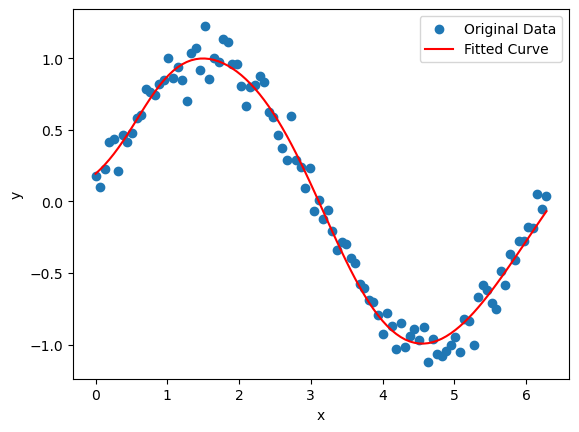

In [4]:
import torch.nn as nn
import torch.optim as optim
import numpy as np
import torch
import matplotlib.pyplot as plt

# Generate some noisy sine wave data
x = np.linspace(0, 2*np.pi, 100)
np.random.seed(0) # for getting out the same random variables every time (reproducability)
y = np.sin(x) + np.random.normal(0, 0.1, 100)

#x: input data
#y: output data
#lambda_l1: LASSO regularization parameter
#optim_alg: choice of optimization algorithm 'LBFGS', 'Adam','SGD'
def my_nn(x,y,lambda_l1,optim_alg):
    # Convert the data to PyTorch tensors
    x_tensor = torch.from_numpy(x).float().unsqueeze(1)
    y_tensor = torch.from_numpy(y).float().unsqueeze(1)

    # Define the neural network model
    class SinNet(nn.Module):
        def __init__(self):
            super(SinNet, self).__init__()
            self.fc1 = nn.Linear(1, 10)   
            self.fc2 = nn.Linear(10, 10)
            self.fc3 = nn.Linear(10, 10)
            self.fc4 = nn.Linear(10, 1)
            self.sigmoid = nn.Sigmoid()

        def forward(self, x):
            x = self.sigmoid(self.fc1(x))
            x = self.sigmoid(self.fc2(x))
            x = self.sigmoid(self.fc3(x))
            x = self.fc4(x)
            return x

    # Set a random seed for reproducibility, the same initial guess
    torch.manual_seed(0)
    
    # Create an instance of the SinNet model
    model = SinNet()  

    # Define the loss function
    criterion = nn.MSELoss()

    # Create a function for LBFGS closure

    def closure():
        optimizer.zero_grad()
        outputs = model(x_tensor)
        loss = criterion(outputs, y_tensor)
    # Calculate the L1 regularization term
        l1_regularization = torch.tensor(0.)
        for param in model.parameters():
            l1_regularization += torch.norm(param, p=1)
    
        # Add the L1 regularization term to the loss
        loss += lambda_l1 * l1_regularization
        loss.backward()
        return loss
    def closure_wrapper():
            loss = closure()
            return loss
    
    
    prev_loss = float('inf')  # Initialize with a large value
    tolerance = 1.e-7
    max_no_epoch=1000

    if optim_alg=='LBFGS':
        optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=1000,tolerance_change=tolerance)
    #alternatively:
    elif optim_alg=='Adam': 
        optimizer = optim.Adam(model.parameters(), lr=0.01)
    elif optim_alg=='SGD': 
        optimizer=torch.optim.SGD(model.parameters(), lr=0.1)

    


    # Training loop
    for epoch in range(max_no_epoch):
        
        optimizer.step(closure_wrapper)

    # Print the loss every 10th epoch
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}], Loss: {closure().item():.4f}")

        loss = closure()
    
        loss_change = prev_loss - loss.item()
        prev_loss = loss.item()
    
        # Check if the optimizer has converged (you can modify this condition)
    
        if optim_alg=='LBFGS':
            if loss_change < tolerance:
                print(f"Optimizer has converged. Stopping training.")
                break

    # Plot the original data and the fitted curve
    plt.scatter(x, y, label='Original Data')
    plt.plot(x, model(x_tensor).detach().numpy(), 'r', label='Fitted Curve')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()
    
    return model

optim_alg='Adam'  #'LBFGS'
# Define the L1 regularization strength (lambda)
lambda_l1 = 0.0001  # You can adjust this value
mymodel=my_nn(x,y,lambda_l1,optim_alg)



How to get out model parameters fron a trained NN

In [47]:

# Now we access the model parameters via the model's state_dict
model_state_dict = mymodel.state_dict()
# Get specific parameter values
fc1_weights = model_state_dict['fc1.weight']
fc1_biases = model_state_dict['fc1.bias']
fc2_weights = model_state_dict['fc2.weight']
fc2_biases = model_state_dict['fc2.bias']
fc3_weights = model_state_dict['fc3.weight']
fc3_biases = model_state_dict['fc3.bias']
fc4_weights = model_state_dict['fc4.weight']
fc4_biases = model_state_dict['fc4.bias']
# Convert these tensors to numpy arrays for further analysis if needed
fc1_weights_np = fc1_weights.numpy()
fc1_biases_np = fc1_biases.numpy()
fc2_weights_np = fc2_weights.numpy()
fc2_biases_np = fc2_biases.numpy()
fc3_weights_np = fc3_weights.numpy()
fc3_biases_np = fc3_biases.numpy()
fc4_weights_np = fc4_weights.numpy()
fc4_biases_np = fc4_biases.numpy()



If you want to set NN model parameters and use for prediction

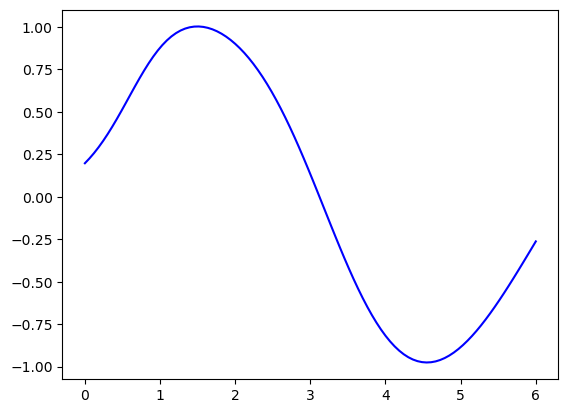

In [48]:
custom_params = {
    'fc1.weight': torch.tensor(fc1_weights_np, dtype=torch.float32),
    'fc1.bias': torch.tensor(fc1_biases_np, dtype=torch.float32),
    'fc2.weight': torch.tensor(fc2_weights_np, dtype=torch.float32),
    'fc2.bias': torch.tensor(fc2_biases_np, dtype=torch.float32),
    'fc3.weight': torch.tensor(fc3_weights_np, dtype=torch.float32),
    'fc3.bias': torch.tensor(fc3_biases_np, dtype=torch.float32),
    'fc4.weight': torch.tensor(fc4_weights_np, dtype=torch.float32),
    'fc4.bias': torch.tensor(fc4_biases_np, dtype=torch.float32)
}

# Set the model's state_dict to the custom parameter values
mymodel.load_state_dict(custom_params)

# Make a prediction
xmax=0.
xmin=6.
xplot=np.linspace(xmin,xmax,100)
xplot_tensor = torch.from_numpy(xplot).float().unsqueeze(1)
plt.plot(xplot_tensor.detach().numpy(), mymodel(xplot_tensor).detach().numpy(), 'b-', label='My NN')
plt.show()

## Examples of other NN classes and activation functions

In [49]:
# Example 1
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        x = self.fc(x)
        return x


# Define custom activation functions
def logsig(x):
    return 1 / (1 + torch.exp(-x))

def radbas(x):
    return torch.exp(-torch.pow(x, 2))

def purelin(x):
    return x


# Example 2
class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        # Layer 1:
        self.layer1 = nn.Linear(in_features=nn_input.shape[1], out_features=10)
        # Layer 2:
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        # Layer 3:
        self.layer3 = nn.Linear(in_features=10, out_features=3)  # 3 output features

    def forward(self, x):
        # Layer 1:
        x = logsig(self.layer1(x))
        # Layer 2:
        x = radbas(self.layer2(x))
        # Layer 3:
        x = purelin(self.layer3(x))
        return x
    

#Example 3
class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        # Define layers for the neural network
        self.fc1 = nn.Linear(1, 10)  # Fully connected layer with 1 input and 10 output units
        self.fc2 = nn.Linear(10, 1)  # Fully connected layer with 10 input and 1 output units
        self.tanh = nn.Tanh()         # Tanh activation function

    def forward(self, x):
        # Define the forward pass of the neural network
        x = self.tanh(self.fc1(x))  # Apply sigmoid activation to the first layer
        x = self.fc2(x)  # Output layer (no activation function)
        return x
    


## Example classification with NN

In [50]:
# Generate synthetic data
np.random.seed(0)
num_samples = 100
num_features = 2

class_0 = np.random.randn(num_samples // 2, num_features) + np.array([-1, -1])  #random numers around -1,-1
class_1 = np.random.randn(num_samples // 2, num_features) + np.array([1, 1])    #random numers around 1,1


x = np.vstack((class_0, class_1))
y=np.zeros((num_samples,2))
y[0:num_samples//2,0]=1.
y[num_samples//2:,1]=1.

# Randomly shuffle the data
np.random.seed(0) # for getting out the same random variables every time (reproducability)
indices = np.random.permutation(num_samples)
# Split the dataset into training and testing sets (80% training, 20% testing)
split_ratio = 0.8
split_index = int(num_samples * split_ratio)

# Split the data based on the shuffled indices
x_train, x_test = x[indices[:split_index],:], x[indices[split_index:],:]
y_train, y_test = y[indices[:split_index],:], y[indices[split_index:],:]


# Convert data to PyTorch tensors
x_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)



# Initialize the model, loss function, and optimizer
input_size = num_features
output_size = 2  # Number of classes
model = SimpleNN(input_size, output_size)
criterion = nn.CrossEntropyLoss()   #here comes cross entropy loss function
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 1000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    probabilities=torch.softmax(outputs, dim=1)   #here comes softmax function 
    loss = criterion(probabilities, y_train_tensor)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print the loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}")

# Model evaluation
model.eval()
with torch.no_grad():
    outputs = model(x_test_tensor)
    probabilities=torch.softmax(outputs, dim=1)
    predicted_classes=torch.argmax(probabilities, dim=1)
    test_classes=torch.argmax(y_test_tensor, dim=1)
accuracy = torch.sum(predicted_classes == test_classes).item() / y_test_tensor.size(0)
print(f"Accuracy: {accuracy * 100:.2f}%")

Epoch [100/1000], Loss: 0.8422
Epoch [200/1000], Loss: 0.6328
Epoch [300/1000], Loss: 0.5255
Epoch [400/1000], Loss: 0.4821
Epoch [500/1000], Loss: 0.4609
Epoch [600/1000], Loss: 0.4485
Epoch [700/1000], Loss: 0.4403
Epoch [800/1000], Loss: 0.4345
Epoch [900/1000], Loss: 0.4301
Epoch [1000/1000], Loss: 0.4267
Accuracy: 95.00%


## Example Lorenz ODE system

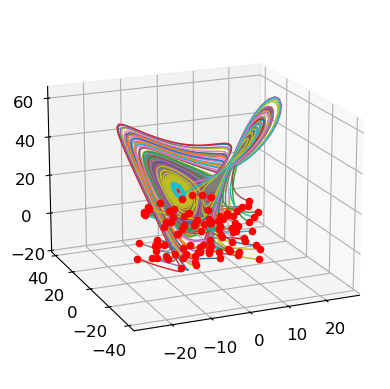

Epoch [100/800], Loss: 144.4049
Epoch [200/800], Loss: 68.2224
Epoch [300/800], Loss: 32.0149
Epoch [400/800], Loss: 17.4387
Epoch [500/800], Loss: 11.2030
Epoch [600/800], Loss: 8.1421
Epoch [700/800], Loss: 6.2436
Epoch [800/800], Loss: 4.9414


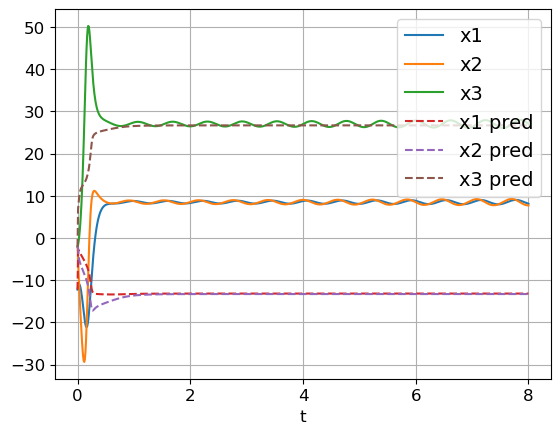

In [22]:
from scipy import integrate
## Simulate the Lorenz System
dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)   #sampling time 0.01, gives 801 timesteps
beta = 8/3
sigma = 10
rho = 28

#define sizes of input and output matrices
nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))  #100 different initial conditions

#x_t: 100 x 801 x 3
x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])   #here the ode is solved for all initial conditions

#save to input and output matrices
m=0
for j in range(100): #loop over initial conditions
    #nn_input 80000 x 3
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,0:800,:] #x_t[j,:-1,:]
    #nn_output 80000 x 3
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:801,:] #x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()



# Convert data to PyTorch tensors
nn_input = torch.tensor(nn_input, dtype=torch.float32).clone().detach()
nn_output = torch.tensor(nn_output, dtype=torch.float32).clone().detach()


# Instantiate the custom neural network
model = CustomNet()

# Define the optimizer
adam_optimizer = optim.Adam(model.parameters(), lr=0.01) #, weight_decay=0.00001)  #optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Define the loss function (use Mean Squared Error for regression)
criterion = nn.MSELoss()

# Training loop
num_epochs = 800
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(nn_input)
    
    # Calculate the loss
    loss = criterion(outputs, nn_output)
    
    # Backpropagation and optimization
    adam_optimizer.zero_grad()
    loss.backward()
    adam_optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")
    #print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

fig, ax = plt.subplots()
rcParams["font.size"] = 14

ax.plot(t,x_t[10,:,0],linestyle='-',label='x1')
ax.plot(t,x_t[10,:,1],linestyle='-',label='x2')
ax.plot(t,x_t[10,:,2],linestyle='-',label='x3')
ax.set_xlabel('t')
ax.grid(visible=True)


# Set the model to evaluation mode
model.eval()
#choose for example 10th initial value x0
xx=torch.tensor(x0[10,:], dtype=torch.float32).clone().detach()
xpred=np.zeros((len(t),3))
#loop over time
for i in range(len(t)):
    xpred[i,:]=xx.numpy()
    with torch.no_grad():
        predictions = model(xx)
    xx=predictions
    
ax.plot(t,xpred[:,0],linestyle='--',label='x1 pred')
ax.plot(t,xpred[:,1],linestyle='--',label='x2 pred')
ax.plot(t,xpred[:,2],linestyle='--',label='x3 pred')
ax.legend(loc='best')
plt.show()

## Function for derivative w.r.t. $x$

In [23]:
#%%  a function to get_derivative, from Kollmannsberger et al.
dtype = torch.float
device = torch.device("cpu")
from torch.autograd import grad

def get_derivative(y, x, n):
    """Compute the nth order derivative of y = f(x) with respect to x."""
    if n == 0:
        return y
    else:
        dy_dx = grad(y, x, torch.ones(x.size()[0], 1, device=device), create_graph=True, retain_graph=True)[0]
        return get_derivative(dy_dx, x, n - 1)

## Example PINN, solution of d.e.

Epoch [1], Loss: 14925.7656
Epoch [2], Loss: 14902.8066
Epoch [3], Loss: 14881.6104
Epoch [4], Loss: 14862.0449
Epoch [5], Loss: 14843.9561
Epoch [6], Loss: 14827.1660
Epoch [7], Loss: 14811.4287
Epoch [8], Loss: 14796.4697
Epoch [9], Loss: 14782.0254
Epoch [10], Loss: 14767.8779
Epoch [11], Loss: 14753.8428
Epoch [12], Loss: 14739.7686
Epoch [13], Loss: 14725.5098
Epoch [14], Loss: 14710.9365
Epoch [15], Loss: 14695.9082
Epoch [16], Loss: 14680.2969
Epoch [17], Loss: 14663.9785
Epoch [18], Loss: 14646.8379
Epoch [19], Loss: 14628.7637
Epoch [20], Loss: 14609.6494
Epoch [21], Loss: 14589.4053
Epoch [22], Loss: 14567.9551
Epoch [23], Loss: 14545.2334
Epoch [24], Loss: 14521.1865
Epoch [25], Loss: 14495.7646
Epoch [26], Loss: 14468.9287
Epoch [27], Loss: 14440.6543
Epoch [28], Loss: 14410.9209
Epoch [29], Loss: 14379.7119
Epoch [30], Loss: 14347.0117
Epoch [31], Loss: 14312.8076
Epoch [32], Loss: 14277.0811
Epoch [33], Loss: 14239.7949
Epoch [34], Loss: 14200.8877
Epoch [35], Loss: 14160

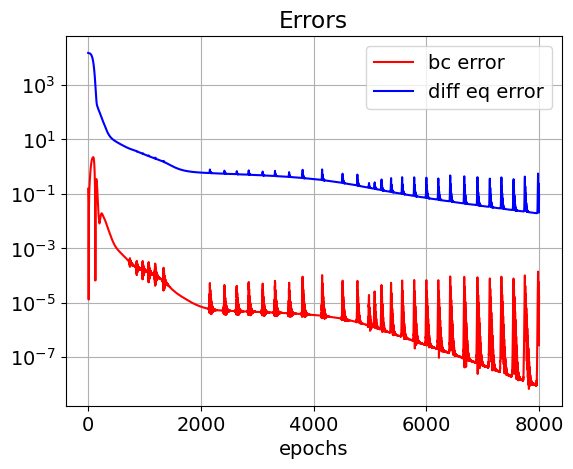

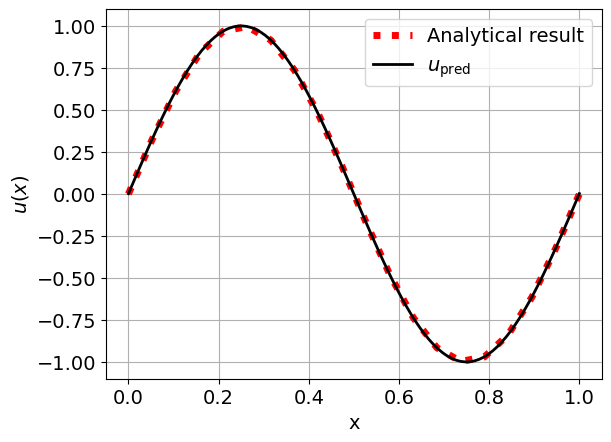

In [25]:
# Create an instance of the MyNet model
model = MyNet()

#%%  Analytical solution
u_analytic = lambda x: np.sin(2 * np.pi * x / L)

# Problem data
#define anonymous (lambda) functions
E = lambda x: 1
A = lambda x: 1
L = 1
u0 = [0,0]  # Dirichlet boundary conditions for both edges
#define anonymous (lambda) function
distLoad = lambda x: 4 * np.pi**2 * E(x) * A(x) / L**2 * torch.sin(2 * np.pi * x / L)


x = torch.linspace(0, L, 100, requires_grad=True).view((-1, 1))


#%% Define loss function
def criterion(x, u_pred):
        """Compute the cost function."""
        # Differential equation loss
        du_dx=get_derivative(u_pred, x, 1)
        differential_equation_loss = get_derivative( E(x) * A(x) * du_dx,x,1)   + distLoad(x)
        differential_equation_loss = torch.sum(differential_equation_loss ** 2)
        # Boundary condition loss initialization
        boundary_condition_loss = 0
        # Sum over dirichlet boundary condition losses
        boundary_condition_loss += (u_pred[0] - u0[0]) ** 2
        boundary_condition_loss += (u_pred[-1] -u0[1]) ** 2
        
        return differential_equation_loss, boundary_condition_loss


#%% function for closure
def closure(x_tensor):
    optimizer.zero_grad() # Clear gradients from the previous iteration
    outputs = model(x_tensor)  #get displacements frp
    loss_de,loss_bc = criterion(x_tensor, outputs) # Compute the loss
    loss = loss_de+100.*loss_bc
# Calculate the L1 regularization term
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)

    # Add the L1 regularization term to the loss
    lambda_l1=0.
    loss += lambda_l1 * l1_regularization # Compute the loss
    loss.backward() # Compute gradients using backpropagation
    return loss,loss_de,loss_bc

#%% training
prev_loss = float('inf')  # Initialize with a large value
tolerance = 1.e-7
max_no_epoch=8000


optim_alg='Adam'
if optim_alg=='LBFGS':
    optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=max_no_epoch,tolerance_change=tolerance)
#alternatively:
elif optim_alg=='Adam': 
    optimizer = optim.Adam(model.parameters(), lr=0.01)
elif optim_alg=='SGD': 
    optimizer=torch.optim.SGD(model.parameters(), lr=0.1)

#training points for the d.e.
x = torch.linspace(0, L, 20, requires_grad=True).view((-1, 1))

#for saving training result
differential_equation_loss_history = np.zeros(max_no_epoch)
boundary_condition_loss_history = np.zeros(max_no_epoch)

def closure_wrapper():
        loss,loss_de,loss_bc = closure(x)
        differential_equation_loss_history[epoch] += loss_de.item()
        boundary_condition_loss_history[epoch] += loss_bc.item()
        return loss 


# Training loop
for epoch in range(max_no_epoch):
    
    loss=optimizer.step(closure_wrapper)
    
# Print the loss every epoch
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}], Loss: {loss.item():.4f}")
            
    loss_change = prev_loss - loss.item()
    prev_loss = loss.item()

    # Check if the optimizer has converged (you can modify this condition)

    if optim_alg=='LBFGS':
        if loss_change < tolerance:
            print(f"Optimizer has converged. Stopping training.")
            break

#%% plot loss function
fig, ax = plt.subplots(nrows=1, ncols=1) # Create a figure with one subplot
ax.semilogy(np.arange(len(boundary_condition_loss_history)), boundary_condition_loss_history,color='red', label='bc error')
ax.semilogy(np.arange(len(boundary_condition_loss_history)), differential_equation_loss_history,color='blue',label="diff eq error")
plt.xlabel(r'epochs')
ax.set_title(r'Errors')
ax.grid(visible=True)
ax.legend(loc='best') 
plt.show()

#%%plot predicted results and analytical solution
u_analytic = lambda x: torch.sin(2 * np.pi * x / L)
fig, ax = plt.subplots(nrows=1, ncols=1) # Create a figure with one subplot
ax.plot(x.detach().numpy(), u_analytic(x).detach().numpy(),color='r',linestyle=':',linewidth=5, label='Analytical result')
x = torch.linspace(0, L, 100, requires_grad=True).view((-1, 1))
pred_displacements = model(x)  #get displacements
ax.plot(x.detach().numpy(), pred_displacements.detach().numpy(),color='k',linestyle='-',linewidth=2, label="$u_{\mathrm{pred}}$")
ax.legend(loc='best') 
plt.xlabel('x')
plt.ylabel('$u(x)$')   
ax.grid(visible=True)
plt.show()

## Example PINN: inverse problem

Epoch [1], Loss: 25965.2734
Epoch [2], Loss: 0.0003
Epoch [3], Loss: 0.0003
Epoch [4], Loss: 0.0003
Epoch [5], Loss: 0.0003
Epoch [6], Loss: 0.0003
Epoch [7], Loss: 0.0003
Epoch [8], Loss: 0.0002
Epoch [9], Loss: 0.0002
Epoch [10], Loss: 0.0002
Epoch [11], Loss: 0.0002
Epoch [12], Loss: 0.0002
Epoch [13], Loss: 0.0002
Epoch [14], Loss: 0.0002
Epoch [15], Loss: 0.0002
Epoch [16], Loss: 0.0002
Optimizer has converged. Stopping training.


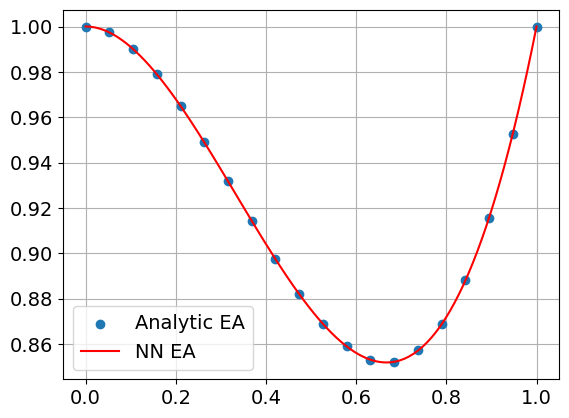

In [26]:
#%% Problem data
N = 20
L = 1

def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    # Reshape on a column tensor and return
    return x.view(samples, 1)


x = generate_grid_1d(L, N)
u_analytic = lambda x: torch.sin(2*np.pi*x)

distLoad = lambda x: -2*(3*x**2 - 2*x)*np.pi*torch.cos(2*np.pi*x) + 4*(x**3 - x**2 + 1)*np.pi**2*torch.sin(2*np.pi*x)

class pinnModel(nn.Module):
    def __init__(self):
        super(pinnModel, self).__init__()
        # Define layers for the neural network
        self.fc1 = nn.Linear(1, 10)  # Fully connected layer with 1 input and 10 output units
        self.fc2 = nn.Linear(10, 1)  # Fully connected layer with 10 input and 1 output units
        self.tanh = nn.Tanh()         # Tanh activation function

    def forward(self, x):
        # Define the forward pass of the neural network
        x = self.tanh(self.fc1(x))  # Apply sigmoid activation to the first layer
        x = self.fc2(x)  # Output layer (no activation function)
        return x
    
# Create an instance of the SinNet model
model = pinnModel()

#%% Define loss function
def criterion(model,x):
        """Compute the cost function."""
        u=u_analytic(x)
        strain=get_derivative(u, x, 1)
        EA=model(x)
        N = EA * strain      # normal force
        # Differential equation loss
        differential_equation_loss = get_derivative(N, x, 1)  + distLoad(x)
        differential_equation_loss = torch.sum(differential_equation_loss ** 2).view(1)
        
        return differential_equation_loss

#%% function for closure
# Create a function for closure
def closure(x_tensor):
    optimizer.zero_grad() # Clear gradients from the previous iteration
    loss_de = criterion(model,x_tensor) # Compute the loss
    loss = loss_de
# Calculate the L1 regularization term
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)

    # Add the L1 regularization term to the loss
    lambda_l1=0.
    loss += lambda_l1 * l1_regularization # Compute the loss
    loss.backward() # Compute gradients using backpropagation
    return loss,loss_de

#%% training
prev_loss = float('inf')  # Initialize with a large value
tolerance = 1.e-7
max_no_epoch=8000


optim_alg='LBFGS'
if optim_alg=='LBFGS':
    optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=max_no_epoch,tolerance_change=tolerance)
#alternatively:
elif optim_alg=='Adam': 
    optimizer = optim.Adam(model.parameters(), lr=0.01)
elif optim_alg=='SGD': 
    optimizer=torch.optim.SGD(model.parameters(), lr=0.1)


#for saving training result
differential_equation_loss_history = np.zeros(max_no_epoch)
# Training loop
for epoch in range(max_no_epoch):
    def closure_wrapper():
        loss,loss_de = closure(x)
        differential_equation_loss_history[epoch] += loss_de.item()
        return loss 
    loss=optimizer.step(closure_wrapper)

# Print the loss every epoch
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}], Loss: {loss.item():.4f}")
            
    loss_change = prev_loss - loss.item()
    prev_loss = loss.item()

    # Check if the optimizer has converged (you can modify this condition)

    if optim_alg=='LBFGS':
        if loss_change < tolerance:
            print(f"Optimizer has converged. Stopping training.")
            break

#%% plot result
EA_analytic = lambda x: x**3 - x**2 + 1
#
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.scatter(x.detach().numpy(), EA_analytic(x).detach().numpy(), label='Analytic EA')
#
#x_dense_tensor=torch.tensor(xdense, requires_grad=True).float().unsqueeze(1)
xdense = generate_grid_1d(L, 100)
pred_EA=model(xdense)

plt.plot(xdense.detach().numpy(),pred_EA.detach().numpy(), 'r', label='NN EA')
ax.legend(loc='best')
ax.grid(visible=True)
plt.show()

## Example PINN data and d.e.

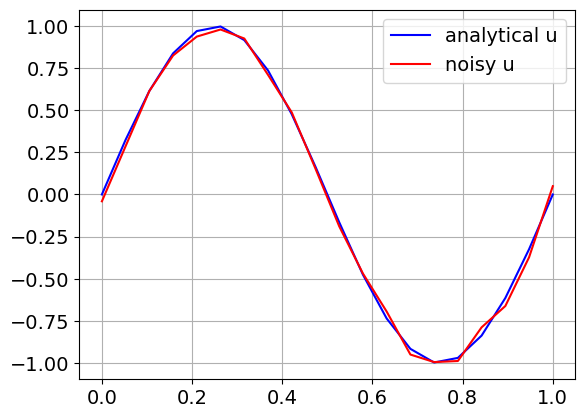

Epoch [1], Loss: 12791.7637
Epoch [2], Loss: 0.0950
Epoch [3], Loss: 0.0949
Epoch [4], Loss: 0.0949
Epoch [5], Loss: 0.0949
Epoch [6], Loss: 0.0949
Epoch [7], Loss: 0.0948
Epoch [8], Loss: 0.0948
Epoch [9], Loss: 0.0948
Epoch [10], Loss: 0.0948
Epoch [11], Loss: 0.0948
Epoch [12], Loss: 0.0947
Epoch [13], Loss: 0.0947
Epoch [14], Loss: 0.0947
Epoch [15], Loss: 0.0947
Epoch [16], Loss: 0.0946
Epoch [17], Loss: 0.0938
Epoch [18], Loss: 0.0938
Epoch [19], Loss: 0.0937
Epoch [20], Loss: 0.0937
Epoch [21], Loss: 0.0936
Epoch [22], Loss: 0.0705
Epoch [23], Loss: 0.0705
Epoch [24], Loss: 0.0705
Epoch [25], Loss: 0.0705
Epoch [26], Loss: 0.0705
Epoch [27], Loss: 0.0704
Epoch [28], Loss: 0.0704
Epoch [29], Loss: 0.0704
Epoch [30], Loss: 0.0704
Epoch [31], Loss: 0.0704
Epoch [32], Loss: 0.0704
Epoch [33], Loss: 0.0704
Epoch [34], Loss: 0.0704
Epoch [35], Loss: 0.0703
Epoch [36], Loss: 0.0703
Epoch [37], Loss: 0.0703
Epoch [38], Loss: 0.0703
Epoch [39], Loss: 0.0703
Epoch [40], Loss: 0.0703
Epoch

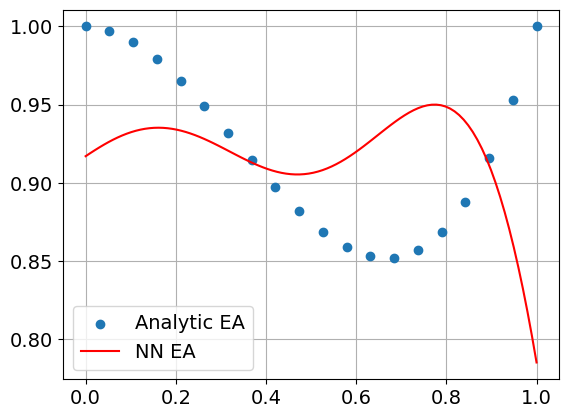

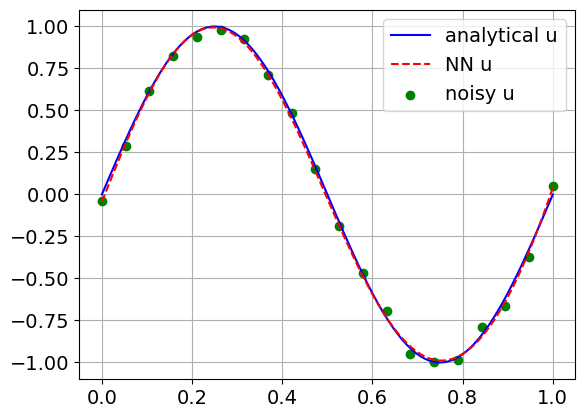

In [27]:
u_random=u_analytic(x) + 0.1 * (torch.rand(len(x), 1) - 0.5).type(torch.FloatTensor)
#print(u_random)

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.plot(x.detach().numpy(),u_analytic(x).detach().numpy(),color='blue',label='analytical u')
plt.plot(x.detach().numpy(),u_random.detach().numpy(),color='red',label='noisy u')
ax.grid(visible=True)
ax.legend(loc='best') 
plt.show()

def generate_grid_1d(length, samples=20, initial_coordinate=0.0):
    """Generate an evenly space grid of a given length and a given number of samples."""

    # Generate the grid
    x = torch.linspace(initial_coordinate, initial_coordinate + length, samples, requires_grad=True)

    # Reshape on a column tensor and return
    return x.view(samples, 1)

class pinnModel(nn.Module):
    def __init__(self):
        super(pinnModel, self).__init__()
        # Define layers for the neural network
        self.fc1 = nn.Linear(1, 20)  # Fully connected layer with 1 input and 10 output units
        self.fc2 = nn.Linear(20, 2)  # Fully connected layer with 10 input and 2 output units
        self.tanh = nn.Tanh()         # Tanh activation function

    def forward(self, x):
        # Define the forward pass of the neural network
        x = self.tanh(self.fc1(x))  # Apply sigmoid activation to the first layer
        x = self.fc2(x)  # Output layer (no activation function)
        return x
    
# Create an instance of the pinnModel model
model = pinnModel()

def closure(x):
    optimizer.zero_grad() # Clear gradients from the previous iteration
    output_tensor =model(x)
    u, EA=torch.split(output_tensor,1,dim=1)
    strain=get_derivative(u, x, 1)
    N=EA*strain
    # Differential equation loss
    loss_de = get_derivative(N, x, 1) + distLoad(x)
    loss_de = torch.sum(loss_de ** 2).view(1)
    #measurement points loss
    MSEcriterion = nn.MSELoss()
    mse_loss = MSEcriterion(u, u_random)
    
# Calculate the L1 regularization term
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
        l1_regularization += torch.norm(param, p=1)

    # Add the L1 regularization term to the loss
    lambda_l1=0.
    loss = loss_de+100.*mse_loss+ lambda_l1 * l1_regularization # Compute the loss
    loss.backward(retain_graph=True) # Compute gradients using backpropagation
    # Manually release the computation graph
    #del loss, loss_de, mse_loss, l1_regularization
    return loss,loss_de

def closure_wrapper():
        loss,loss_de = closure(x)
        differential_equation_loss_history[epoch] = loss_de.item()
        return loss 

#%% training
prev_loss = float('inf')  # Initialize with a large value
tolerance = 1.e-7
max_no_epoch=8000


optim_alg='LBFGS'
if optim_alg=='LBFGS':
    optimizer = optim.LBFGS(model.parameters(), lr=0.01, max_iter=max_no_epoch,tolerance_change=tolerance)
#alternatively:
elif optim_alg=='Adam': 
    optimizer = optim.Adam(model.parameters(), lr=0.01)
elif optim_alg=='SGD': 
    optimizer=torch.optim.SGD(model.parameters(), lr=0.1)


#for saving training result
differential_equation_loss_history = np.zeros(max_no_epoch)
# Training loop
for epoch in range(max_no_epoch):
    
    loss=optimizer.step(closure_wrapper)
    
# Print the loss every epoch
    if (epoch + 1) % 1 == 0:
        print(f"Epoch [{epoch+1}], Loss: {loss.item():.4f}")
            
    loss_change = prev_loss - loss.item()
    prev_loss = loss.item()

    # Check if the optimizer has converged (you can modify this condition)

    if optim_alg=='LBFGS':
        if loss_change < tolerance:
            print(f"Optimizer has converged. Stopping training.")
            break


output_tensor =model(x)
u, EA=torch.split(output_tensor,1,dim=1)

#%% plot result
EA_analytic = lambda x: x**3 - x**2 + 1
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.scatter(x.detach().numpy(), EA_analytic(x).detach().numpy(), label='Analytic EA')
#
xdense = generate_grid_1d(L, 100)
output_tensor =model(xdense)
u, EA=torch.split(output_tensor,1,dim=1)

plt.plot(xdense.detach().numpy(),EA.detach().numpy(), 'r', label='NN EA')
ax.grid(visible=True)
ax.legend(loc='best')
plt.show()

fig, ax = plt.subplots(nrows=1, ncols=1)
plt.plot(xdense.detach().numpy(),u_analytic(xdense).detach().numpy(),color='blue',label='analytical u')
plt.plot(xdense.detach().numpy(),u.detach().numpy(),color='red',linestyle='--',label='NN u')
plt.scatter(x.detach().numpy(),u_random.detach().numpy(),color='green',label='noisy u')
ax.grid(visible=True)
ax.legend(loc='best') 
plt.show()


## Model discovery, SinDy

Assume a dynamical system and an approximation:
$$ \dot{\boldsymbol x}(t)=
\left[ \dot{x}_1(t), \, \dot{x}_2(t), \, \ldots \dot{x}_n(t) \right]^T=
{\boldsymbol f}(\boldsymbol x(t)) \approx \sum_{k=1}^p {\boldsymbol \theta}_k(\boldsymbol x(t)) \,{\xi}_k={\boldsymbol \Theta}(\boldsymbol x(t)) \,{\boldsymbol \xi}$$
where $\theta_k$ is defined as e.g. polynomials of $\boldsymbol x$ (each with size dim($\boldsymbol x$)=$n$)   and $ {\boldsymbol \Theta}$ has size $n\times p$. $\xi_k$ are scalars  and size of ${\boldsymbol \xi}$ is $p \times 1$.


The dynamical system can be represented as:
$$
\dot{\boldsymbol X}=\boldsymbol{\Theta}(\boldsymbol X) \, \boldsymbol \Xi
$$
where $\boldsymbol{\Theta}(\boldsymbol X)$ has size $m \times p$ and $\boldsymbol \Xi$ size $p \times n$.

Assume given data given in $m$ timesteps:
$$
\boldsymbol X = \begin{bmatrix} x_1(t_1) & x_2(t_1) & \ldots & x_n(t_1) \\
\vdots & \vdots &\vdots & \vdots\\
 x_1(t_m) & x_2(t_m) & \ldots & x_n(t_m) \\
\end{bmatrix}
$$
and for $\dot{\boldsymbol X}$.

Help function to create $\Theta$ for polynomials

In [ ]:
from itertools import combinations_with_replacement

def polynomial_library(X, degree=3, include_bias=True, return_names=True):
    """
    Build a polynomial feature library (monomials) up to the given degree.
    Works for any number of inputs (columns in X) and any degree >= 0.

    Parameters
    ----------
    X : array, shape (n_samples, n_features)
        Input data (each column is a variable x1..x_n).
    degree : int
        Maximum total degree of monomials to include.
    include_bias : bool
        If True, include the constant column (1).
    return_names : bool
        If True, also return a list of column names for interpretability.

    Returns
    -------
    Phi : array, shape (n_samples, n_terms)
        Polynomial feature matrix [1, x_i, x_i x_j, ..., up to 'degree'].
    names : list of str (optional)
        Names like ['1','x1','x2','x1^2','x1*x2', ...].
    """
    X = np.asarray(X)
    if X.ndim == 1:
        X = X[:, None]  # allow 1D input

    n_samples, n_features = X.shape
    cols = []
    names = []

    # Degree 0 (bias)
    if include_bias:
        cols.append(np.ones((n_samples, 1)))
        if return_names:
            names.append("1")

    # Degrees 1..degree
    for d in range(1, degree + 1):
        for idxs in combinations_with_replacement(range(n_features), d):
            # product of selected columns; idxs is nondecreasing => unique monomial
            col = np.prod(X[:, idxs], axis=1, dtype=float)[:, None]
            cols.append(col)
            if return_names:
                # Build a readable name like x1^2*x3
                # Count powers per variable in this combo
                powers = np.bincount(idxs, minlength=n_features)
                parts = []
                for j, p in enumerate(powers):
                    if p == 0: 
                        continue
                    parts.append(f"x{j+1}" if p == 1 else f"x{j+1}^{p}")
                names.append("*".join(parts))

    Phi = np.hstack(cols) if cols else np.empty((n_samples, 0))

    return (Phi, names) if return_names else Phi

#Example of how to create Theta from X
m=100
t=np.linspace(0,1,m)
X=np.zeros((m,3))
X[:,0]=3*np.exp( 2*t )
X[:,1]=np.exp( -2*t )
X[:,2]=np.sin( 2*t )
Theta, theta_library = polynomial_library(x, degree=3, include_bias=True)
#print(theta_library)
#print(Theta)

Sparse regression algorithm to find $\boldsymbol \xi$:

In [ ]:
#sequential least square
def sparsifyDynamics(Theta,dXdt,lamb,n):
    Xi = np.linalg.lstsq(Theta,dXdt,rcond=None)[0] # Initial guess: Least-squares
    
    for k in range(10):
        smallinds = np.abs(Xi) < lamb # Find small coefficients, here is the threshold
        Xi[smallinds] = 0                          # and threshold
        for ind in range(n):                       # n is state dimension
            biginds = smallinds[:,ind] == 0
            # Regress dynamics onto remaining terms to find sparse Xi
            Xi[biginds,ind] = np.linalg.lstsq(Theta[:,biginds],dXdt[:,ind],rcond=None)[0]
            
    return Xi

Example of usage:

In [ ]:
lamb = 0.0001 # sparsification limit
Xi = sparsifyDynamics(Theta, Xdot, lamb,np.size(Xdot,1)) 

#now a trick to get informative output
Xi_object=Xi.astype(object)
theta_library_column = np.array(theta_library).reshape(-1, 1)
print(np.hstack((Xi_object, theta_library_column)))